## Topic - Bank Marketing Campaign

### Dataset Description
Dataset name: Bank Marketing<br>
Source: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

### Objective: 
The data is related to direct marketing campaigns (phone calls) of a banking institution. The classification goal is to predict if the client will subscribe (yes/no) to a term deposit (variable y).

### Attribute Information:
Bank client's features : Age, Job, Marital, Education, Default(has credit in default), Housing, Loan.<br>
Contact with client features : Contact, Month, Day of week, Duration.<br>
Other attributes : Campaign(number of contacts performed during this campaign), Pdays, Previous, Poutcome.<br>
Target attribute : y (has the client subscribed a term deposit).<br>

### Steps:
1. Exploratory data analysis & Data preparation
2. Model Building-<br>
Logistic Regression<br>
K Nearest Neighbors (knn)<br>
Decision Tree<br>
Random Forests<br>
Support Vector Machine (Svm)<br>
Naive Bayes<br>
3. Comparison<br>
4. Result

### Exploratory data analysis & Data preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('bank-additional-full.csv')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.shape

(41188, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Mean Age is aproximately 40 years old. (Minimum: 17 years old and Maximum: 98 years old.) 

In [7]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Note: There are many attributes. So to properly analyze all the features, we will split data into three different data frames based on the attribute information.

####  Bank client attributes

In [8]:
data_client = pd.DataFrame(data.iloc[:,0:7])

In [9]:
data_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [10]:
data_client.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
housing      0
loan         0
dtype: int64

In [11]:
data_client['age'].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64)

In [12]:
data_client['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [13]:
data_client['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [14]:
data_client['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [15]:
data_client['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [16]:
data_client['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [17]:
data_client['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

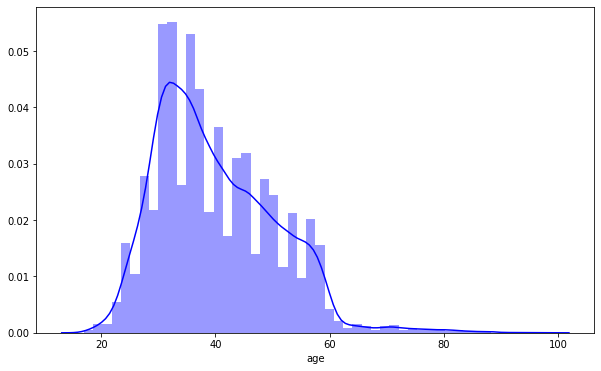

In [18]:
plt.figure(figsize=(10,6))
sns.distplot(data_client['age'],color='blue')

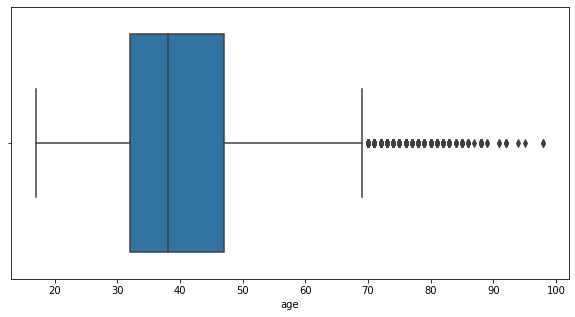

In [19]:
plt.figure(figsize = (10,5))
sns.boxplot(data = data_client, x = 'age')

Note: variable 'age' contains many outliers. Now we will calculate the exact number of outliers.

In [20]:
# formula used : Q3 + 1.5 * (Q3-Q1)
above=data_client['age'].quantile(q = 0.75)+1.5*(data_client['age'].quantile(q = 0.75)-data_client['age'].quantile(q = 0.25))
print('Ages above:',above,'are outliers')
print('')
number = data_client[data_client['age'] > 69.6]['age'].count()
print('Numerber of outliers:',number)

Ages above: 69.5 are outliers

Numerber of outliers: 469


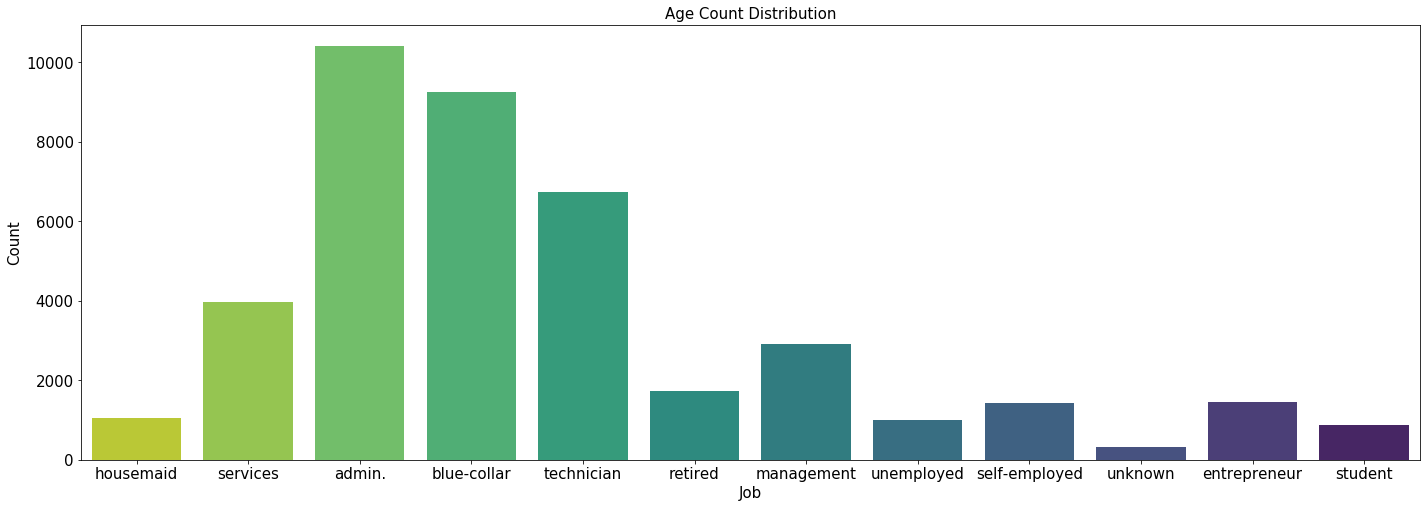

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(24,8)
sns.countplot(data = data_client, x = 'job', palette = 'viridis_r')
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)

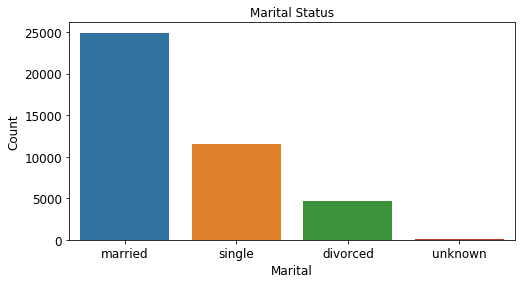

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(8,4)
sns.countplot(data = data_client, x = 'marital')
ax.set_xlabel('Marital', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Marital Status', fontsize=12)
ax.tick_params(labelsize=12)

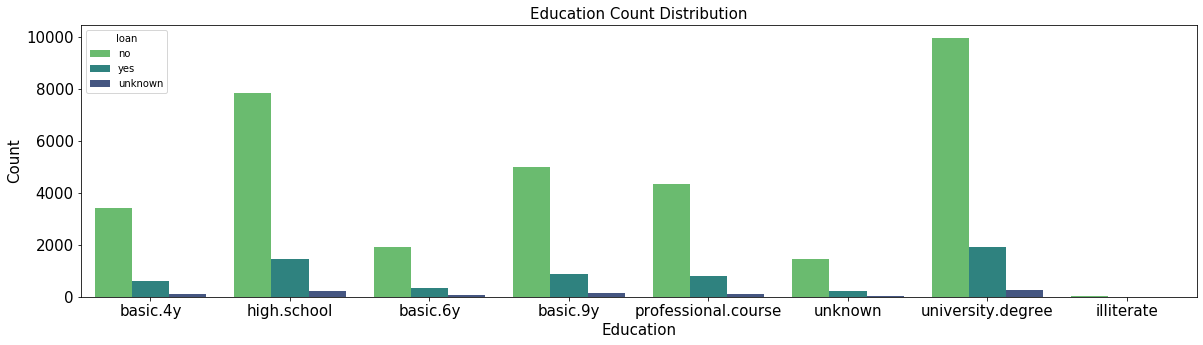

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', hue = 'loan', data = data_client, palette = 'viridis_r')
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)

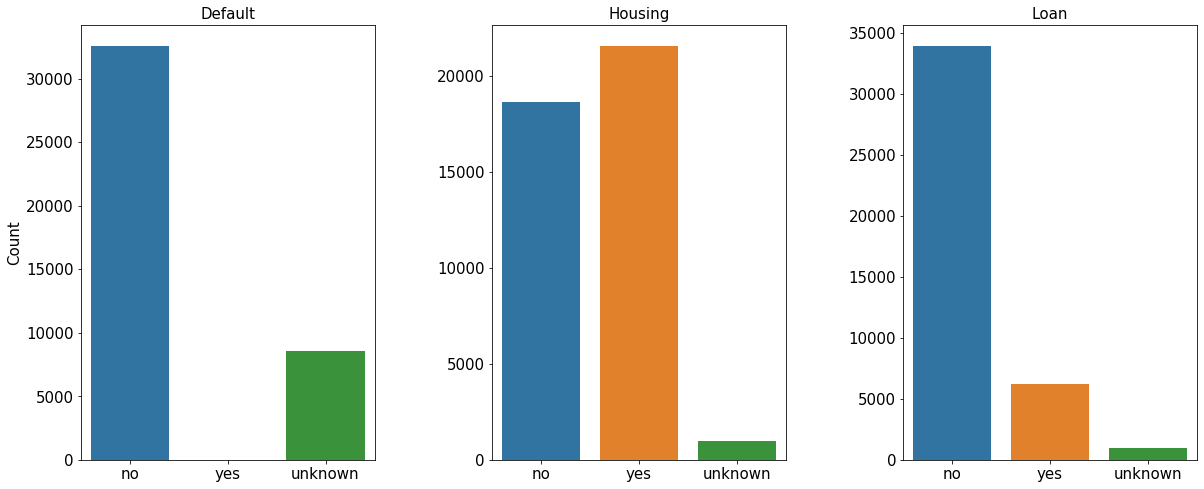

In [24]:
# Default
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = data_client, ax = ax1, order = ['no', 'yes', 'unknown'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing
sns.countplot(x = 'housing', data = data_client, ax = ax2, order = ['no', 'yes', 'unknown'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.tick_params(labelsize=15)

# Loan
sns.countplot(x = 'loan', data = data_client, ax = ax3, order = ['no', 'yes', 'unknown'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.4)

In [25]:
# converting catagorical variables into numerical variables
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
data_client['job']      = labelencoder_X.fit_transform(data_client['job']) 
data_client['marital']  = labelencoder_X.fit_transform(data_client['marital']) 
data_client['education']= labelencoder_X.fit_transform(data_client['education']) 
data_client['default']  = labelencoder_X.fit_transform(data_client['default']) 
data_client['housing']  = labelencoder_X.fit_transform(data_client['housing']) 
data_client['loan']     = labelencoder_X.fit_transform(data_client['loan']) 

In [26]:
data_client.head()

,age,job,marital,education,default,housing,loan
0,56,3,1,0,0,0,0
1,57,7,1,3,1,0,0
2,37,7,1,3,0,2,0
3,40,0,1,1,0,0,0
4,56,7,1,3,0,0,2


In [27]:
data_client['age'].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64)

In [28]:
# function to create groups of ages because we have so many different ages 
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(data_client);

In [29]:
data_client['age'].unique()

array([3, 2, 1, 4], dtype=int64)

In [30]:
# final
data_client.head()

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


In [31]:
data_client.shape

(41188, 7)

#### attributes related with the last contact of the current campaign

In [32]:
data_contact = data.iloc[: , 7:11]
data_contact.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [33]:
data_contact.isnull().sum()

contact        0
month          0
day_of_week    0
duration       0
dtype: int64

In [34]:
data_contact['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [35]:
data_contact['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [36]:
data_contact['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [37]:
data_contact['duration'].nunique()

1544

NOTE: variable 'duration' contains a lot of unique values. Hence we need to group these values.

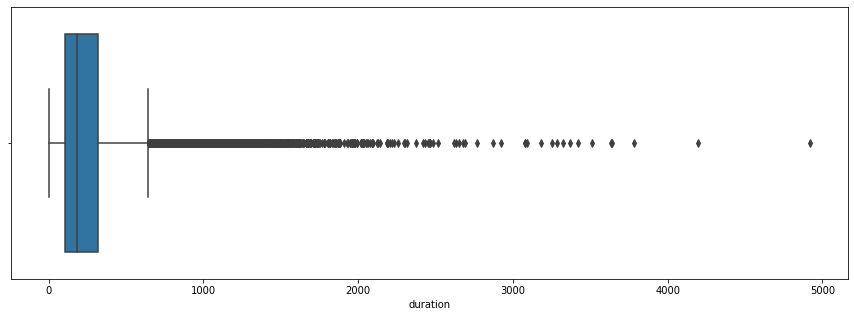

In [38]:
plt.figure(figsize = (15,5))
sns.boxplot(data = data_contact, x = 'duration')

In [39]:
print("Max duration  call in minutes:  ", round((data_contact['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((data_contact['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((data_contact['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((data_contact['duration'].std()/60),1))

Max duration  call in minutes:   82.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD duration  call in minutes:    4.3


Std close to the mean means that the data values are close to the mean 

In [40]:
# formula used : Q3 + 1.5 * (Q3-Q1)
above=data_contact['duration'].quantile(q = 0.75)+1.5*(data_contact['duration'].quantile(q = 0.75)-data_contact['duration'].quantile(q = 0.25))
print('Duration above:',above,'are outliers')
print('')
percent = round(data_contact[data_contact['duration'] > 644.5]['duration'].count()*100/len(data_contact),2)
print('Outliers are:',percent,'%')

Duration above: 644.5 are outliers

Outliers are: 7.19 %


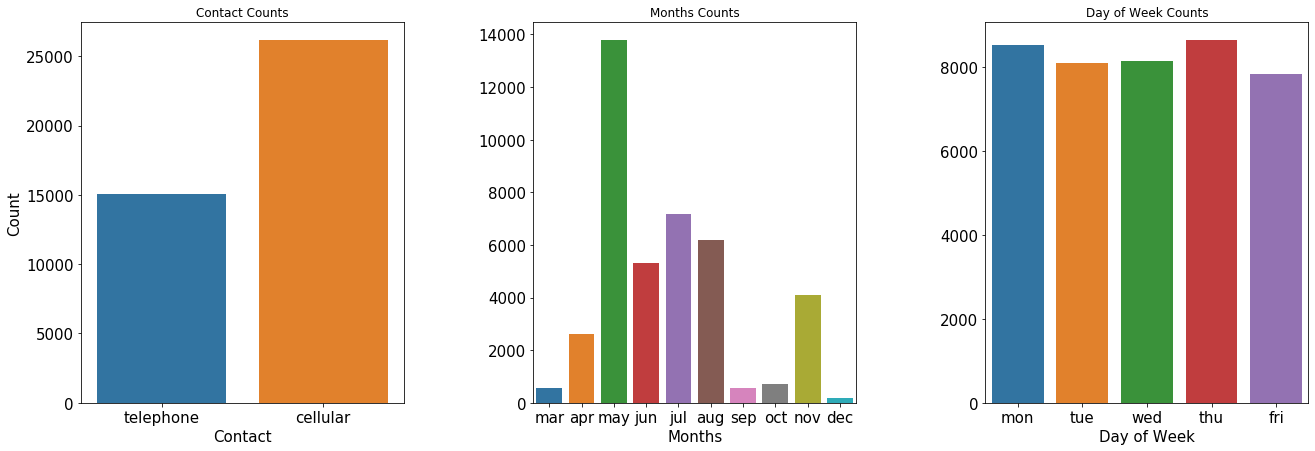

In [41]:
# contact counts
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (22,7))
sns.countplot(data_contact['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 15)
ax1.set_ylabel('Count', fontsize = 15)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=15)

# month counts
sns.countplot(data_contact['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 15)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=15)

# day of week count
sns.countplot(data_contact['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 15)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.4)

In [42]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
data_contact['contact']     = labelencoder_X.fit_transform(data_contact['contact']) 
data_contact['month']       = labelencoder_X.fit_transform(data_contact['month']) 
data_contact['day_of_week'] = labelencoder_X.fit_transform(data_contact['day_of_week']) 

In [43]:
data_contact.head()

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,151
4,1,6,1,307


In [44]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration'] = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration'] = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data

duration(data_contact);

In [45]:
# final
data_contact.head()

,contact,month,day_of_week,duration
0,1,6,1,3
1,1,6,1,2
2,1,6,1,3
3,1,6,1,2
4,1,6,1,3


#### Other attributes

In [46]:
data_other = data.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
                           'campaign', 'pdays','previous', 'poutcome']]

In [47]:
data_other.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
0,1.1,93.994,-36.4,4.857,5191.0,1,999,0,nonexistent
1,1.1,93.994,-36.4,4.857,5191.0,1,999,0,nonexistent
2,1.1,93.994,-36.4,4.857,5191.0,1,999,0,nonexistent
3,1.1,93.994,-36.4,4.857,5191.0,1,999,0,nonexistent
4,1.1,93.994,-36.4,4.857,5191.0,1,999,0,nonexistent


In [48]:
# only one categorical variable
data_other['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [49]:
data_other['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [50]:
data_other['poutcome'].unique()

array([1, 2, 3], dtype=int64)

In [51]:
data_other.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
0,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
1,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
2,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
3,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
4,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1


#### Target attribute

In [52]:
data_target = data.loc[:,['y']]

In [53]:
data_target.head()

,y
0,no
1,no
2,no
3,no
4,no


In [54]:
data_target.isnull().sum()

y    0
dtype: int64

In [55]:
data_target['y'].unique()

array(['no', 'yes'], dtype=object)

In [56]:
data_target['y'].replace(['no','yes'], [0,1], inplace  = True)

In [57]:
data_target['y'].unique()

array([0, 1], dtype=int64)

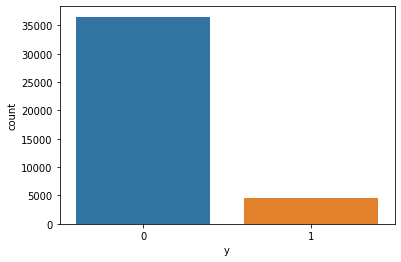

In [58]:
sns.countplot(x='y',data = data_target)

#### After cleaning final dataframe

In [59]:
data_final= pd.concat([data_client, data_contact, data_other, data_target], axis = 1)

In [60]:
data_final.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome,y
0,3,3,1,0,0,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,0
1,3,7,1,3,1,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,0
2,2,7,1,3,0,2,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,0
3,2,0,1,1,0,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,0
4,3,7,1,3,0,0,2,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,0


In [61]:
data_final.shape

(41188, 21)

### Feature selection

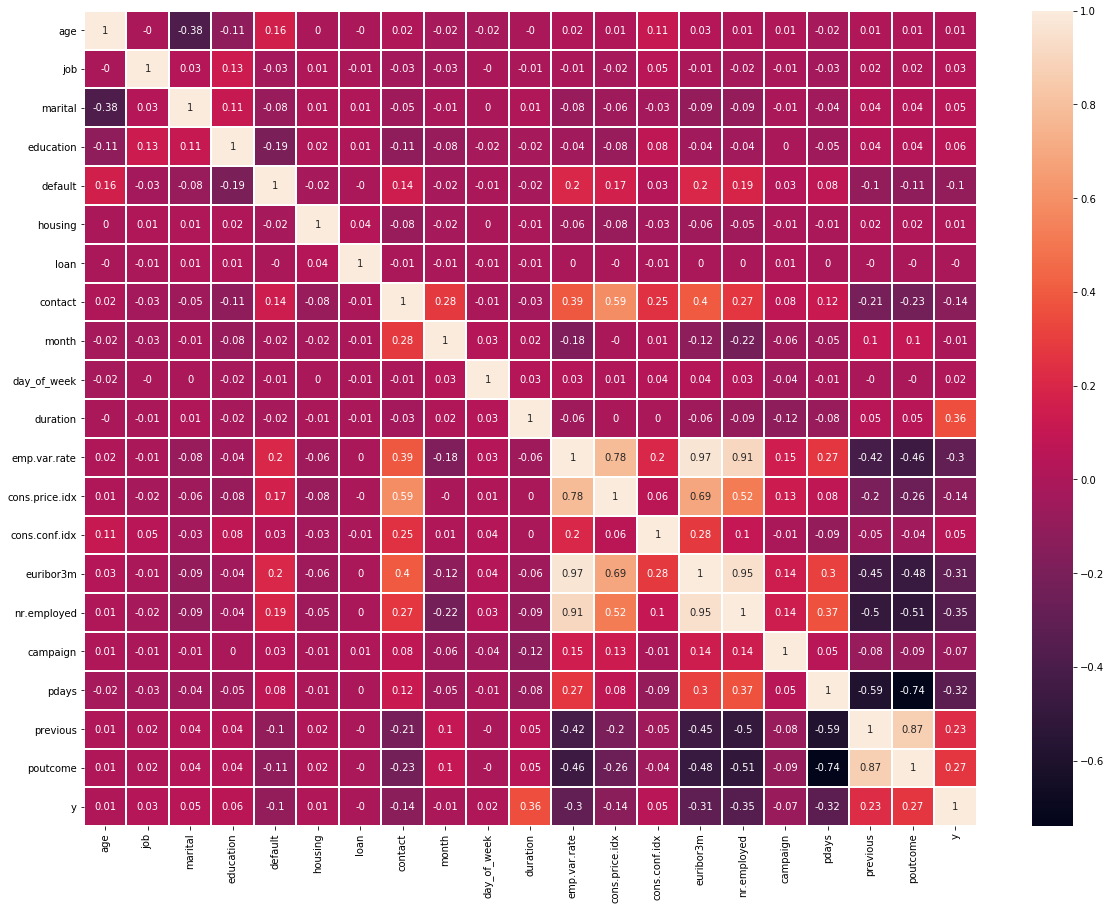

In [62]:
# Basic method
plt.figure(figsize=(20,15))
sns.heatmap(round(data_final.corr(),2),annot = True,linewidths=1,linecolor='white')

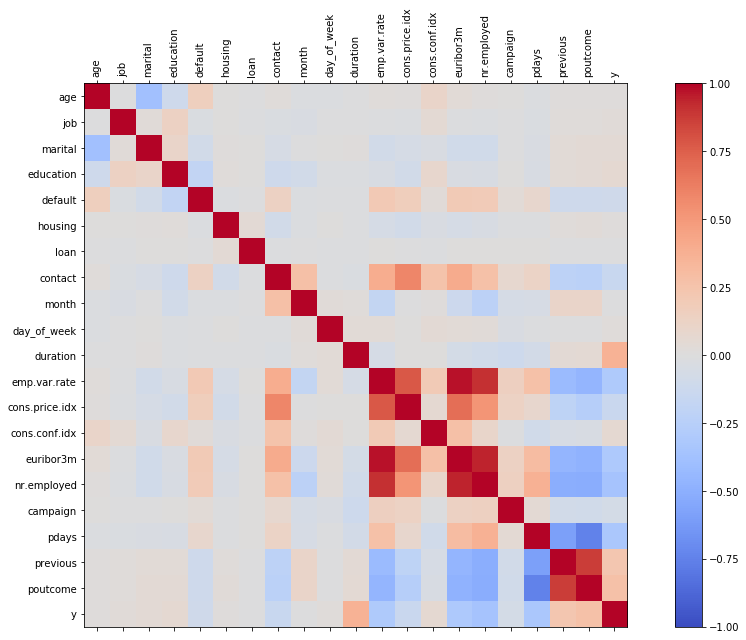

In [63]:
corr = data_final.corr()
fig = plt.figure(figsize=(17,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data_final.columns)
ax.set_yticklabels(data_final.columns)
plt.show()

var.rate and price.idx are highly correlated, euribor3m and nr.employed are highly correlated, previous and poutcome are correlated

In [64]:
# Create correlation matrix
corr_matrix = data_final.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [65]:
to_drop

['euribor3m']

In [66]:
data_final.drop(['euribor3m','emp.var.rate'],axis = 1, inplace = True)

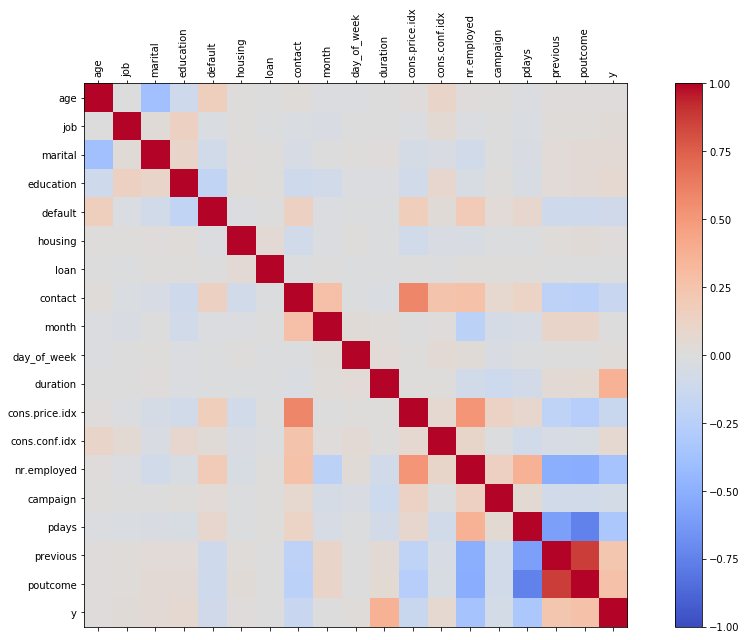

In [67]:
corr = data_final.corr()
fig = plt.figure(figsize=(17,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data_final.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data_final.columns)
ax.set_yticklabels(data_final.columns)
plt.show()

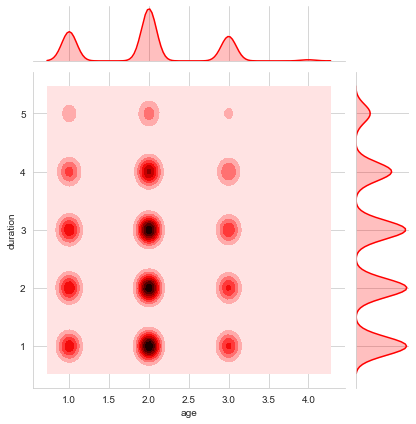

In [68]:
sns.set_style('whitegrid')
sns.jointplot(x='age',y='duration',data=data_final,color='red',kind='kde');

Age = 2.0 means age between 32 to 47 years. 

In [69]:
#data_final.head()

In [70]:
data_final = data_final.rename(columns={'cons.price.idx':'c_price_index', 'cons.conf.idx':'c_confidence_index', 
                                         'nr.employed':'no_of_employees'})

In [71]:
data_final.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,c_price_index,c_confidence_index,no_of_employees,campaign,pdays,previous,poutcome,y
0,3,3,1,0,0,0,0,1,6,1,3,93.994,-36.4,5191.0,1,999,0,1,0
1,3,7,1,3,1,0,0,1,6,1,2,93.994,-36.4,5191.0,1,999,0,1,0
2,2,7,1,3,0,2,0,1,6,1,3,93.994,-36.4,5191.0,1,999,0,1,0
3,2,0,1,1,0,0,0,1,6,1,2,93.994,-36.4,5191.0,1,999,0,1,0
4,3,7,1,3,0,0,2,1,6,1,3,93.994,-36.4,5191.0,1,999,0,1,0


## Model Building

In [72]:
# standardize everything before applying algorithm.
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()
scaler.fit(data_final.drop('y',axis=1))
scaled_features = scaler.transform(data_final.drop('y', axis=1))

In [74]:
# these are scaled versions of actual values
scaled_features

array([[ 1.38823133, -0.20157925, -0.2837415 , ...,  0.1954139 ,
        -0.34949428, -0.37280202],
       [ 1.38823133,  0.91122681, -0.2837415 , ...,  0.1954139 ,
        -0.34949428, -0.37280202],
       [ 0.02907204,  0.91122681, -0.2837415 , ...,  0.1954139 ,
        -0.34949428, -0.37280202],
       ...,
       [ 1.38823133,  0.35482378, -0.2837415 , ...,  0.1954139 ,
        -0.34949428, -0.37280202],
       [ 0.02907204,  1.46762984, -0.2837415 , ...,  0.1954139 ,
        -0.34949428, -0.37280202],
       [ 2.74739063,  0.35482378, -0.2837415 , ...,  0.1954139 ,
         1.67113606,  1.82139197]])

In [75]:
# creating the data frame of scaled_features
data_feat = pd.DataFrame(scaled_features,columns=data_final.columns[:-1])
data_feat.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,c_price_index,c_confidence_index,no_of_employees,campaign,pdays,previous,poutcome
0,1.388231,-0.201579,-0.283741,-1.753925,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.348401,0.722722,0.886447,0.33168,-0.565922,0.195414,-0.349494,-0.372802
1,1.388231,0.911227,-0.283741,-0.349730,1.945327,-1.087707,-0.452491,1.31827,0.762558,-0.718834,-0.459182,0.722722,0.886447,0.33168,-0.565922,0.195414,-0.349494,-0.372802
2,0.029072,0.911227,-0.283741,-0.349730,-0.513600,0.942127,-0.452491,1.31827,0.762558,-0.718834,0.348401,0.722722,0.886447,0.33168,-0.565922,0.195414,-0.349494,-0.372802
3,0.029072,-1.036184,-0.283741,-1.285860,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,-0.459182,0.722722,0.886447,0.33168,-0.565922,0.195414,-0.349494,-0.372802
4,1.388231,0.911227,-0.283741,-0.349730,-0.513600,-1.087707,2.311440,1.31827,0.762558,-0.718834,0.348401,0.722722,0.886447,0.33168,-0.565922,0.195414,-0.349494,-0.372802


### 1. Logistic Regression 

In [76]:
# spliting data into test and train
x = data_feat
y = data_final['y']           

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [78]:
from sklearn.linear_model import LogisticRegression
# creating the instance of logistic regression model
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
log_predictions = logmodel.predict(x_test)

In [80]:
from sklearn.metrics import classification_report, confusion_matrix

In [81]:
print(classification_report(y_test,log_predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10978
           1       0.66      0.35      0.46      1379

    accuracy                           0.91     12357
   macro avg       0.79      0.66      0.70     12357
weighted avg       0.89      0.91      0.89     12357



In [82]:
print(confusion_matrix(y_test,log_predictions))

[[10728   250]
 [  895   484]]


In [83]:
print('True negative=',10728)
print('True positive=',484)
print('False positive=',250)
print('False negative=',895)

True negative= 10728
True positive= 484
False positive= 250
False negative= 895


In [84]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = logmodel, X = x_train, y = y_train, cv = 10)

In [85]:
acc = round(accuracies.mean(),2)
print('Accuracy =',acc*100,'%')

Accuracy = 91.0 %


overall model performance is very good with accuracy of 91% 

### 2. K Nearest Neighbors (knn)

In [86]:
# we already standardized our data 
data_feat.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,c_price_index,c_confidence_index,no_of_employees,campaign,pdays,previous,poutcome
0,1.388231,-0.201579,-0.283741,-1.753925,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.348401,0.722722,0.886447,0.33168,-0.565922,0.195414,-0.349494,-0.372802
1,1.388231,0.911227,-0.283741,-0.349730,1.945327,-1.087707,-0.452491,1.31827,0.762558,-0.718834,-0.459182,0.722722,0.886447,0.33168,-0.565922,0.195414,-0.349494,-0.372802
2,0.029072,0.911227,-0.283741,-0.349730,-0.513600,0.942127,-0.452491,1.31827,0.762558,-0.718834,0.348401,0.722722,0.886447,0.33168,-0.565922,0.195414,-0.349494,-0.372802
3,0.029072,-1.036184,-0.283741,-1.285860,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,-0.459182,0.722722,0.886447,0.33168,-0.565922,0.195414,-0.349494,-0.372802
4,1.388231,0.911227,-0.283741,-0.349730,-0.513600,-1.087707,2.311440,1.31827,0.762558,-0.718834,0.348401,0.722722,0.886447,0.33168,-0.565922,0.195414,-0.349494,-0.372802


In [87]:
x = data_feat
y = data_final['y']

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
# to choose the correct 'k' value for that will use elbow method
error_rate = [] 

for i in range(1,25):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    
    predictions_i = knn.predict(x_test)
    
    error_rate.append(np.mean(predictions_i != y_test))

In [91]:
error_rate

[0.12090313182811362,
 0.10415149308084487,
 0.10512260257344015,
 0.10099538722991017,
 0.09905316824471959,
 0.09864853928947155,
 0.09889131666262038,
 0.09759650400582666,
 0.09743465242372744,
 0.09622076555798333,
 0.09678724609533058,
 0.0970300234684794,
 0.0980011329610747,
 0.09694909767742979,
 0.09670632030428097,
 0.09678724609533058,
 0.09735372663267783,
 0.09727280084162823,
 0.09727280084162823,
 0.09678724609533058,
 0.0968681718863802,
 0.09751557821477705,
 0.09743465242372744,
 0.09719187505057862]

Text(0, 0.5, 'Error Rate')

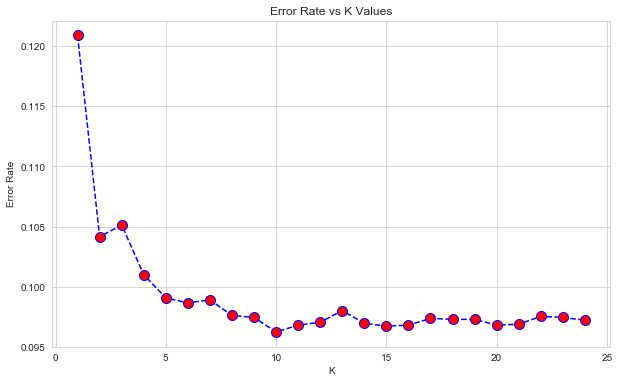

In [92]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Values')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [93]:
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                     weights='uniform')

In [94]:
knn_predictions = knn.predict(x_test)
knn_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [95]:
print(classification_report(y_test,knn_predictions))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10978
           1       0.66      0.26      0.37      1379

    accuracy                           0.90     12357
   macro avg       0.79      0.62      0.66     12357
weighted avg       0.89      0.90      0.88     12357



In [96]:
print(confusion_matrix(y_test,knn_predictions))

[[10799   179]
 [ 1026   353]]


In [97]:
print('True negative=',10799)
print('True positive=',353)
print('False positive=',179)
print('False negative=',1026)

True negative= 10799
True positive= 353
False positive= 179
False negative= 1026


In [98]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn, X = x_train, y = y_train, cv = 10)

In [99]:
accuarcy = round(accuracies.mean(),2)
print('Accuracy =',accuarcy*100,'%')

Accuracy = 90.0 %


overall performance of model is good with accuracy = 90%

### 3. Decision Tree 

In [100]:
#data_final.head()

In [101]:
x = data_final.drop('y',axis=1)
y = data_final['y']

In [102]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [103]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy',random_state=101)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

In [104]:
tree_predictions = dtree.predict(x_test)
tree_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [105]:
print(classification_report(y_test,tree_predictions))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10978
           1       0.45      0.46      0.46      1379

    accuracy                           0.88     12357
   macro avg       0.69      0.70      0.69     12357
weighted avg       0.88      0.88      0.88     12357



In [106]:
print(confusion_matrix(y_test,tree_predictions))

[[10209   769]
 [  742   637]]


In [107]:
print('True negative=',10209)
print('True positive=',637)
print('False positive=',769)
print('False negative=',742)

True negative= 10209
True positive= 637
False positive= 769
False negative= 742


In [108]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = dtree, X = x_train, y = y_train, cv = 10)

In [109]:
accuarcy = round(accuracies.mean(),2)
print('Accuracy =',accuarcy*100,'%')

Accuracy = 88.0 %


overall performance of model is good with accuracy = 88%

### 4. Random Forests

In [110]:
#data_final.head()

In [111]:
x = data_final.drop('y',axis=1)
y = data_final['y']

In [112]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [114]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=101)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [115]:
rfc_pred = rfc.predict(x_test)

In [116]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10978
           1       0.60      0.49      0.54      1379

    accuracy                           0.91     12357
   macro avg       0.77      0.72      0.74     12357
weighted avg       0.90      0.91      0.90     12357



In [117]:
print(confusion_matrix(y_test,rfc_pred))

[[10536   442]
 [  707   672]]


In [118]:
print('True negative=',10539)
print('True positive=',642)
print('False positive=',439)
print('False negative=',737)

True negative= 10539
True positive= 642
False positive= 439
False negative= 737


In [119]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfc, X = x_train, y = y_train, cv = 10)

In [120]:
accuarcy = round(accuracies.mean(),2)
print('Accuracy =',accuarcy*100,'%')

Accuracy = 91.0 %


Random Forests performed better than Decision Tree 

### 5. Support Vector Machine (Svm)

In [121]:
#data_feat.head()

In [122]:
x = data_feat
y = data_final['y']

In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [124]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [125]:
svm_predictions = model.predict(x_test)
svm_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [126]:
print(classification_report(y_test,svm_predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10978
           1       0.69      0.31      0.43      1379

    accuracy                           0.91     12357
   macro avg       0.80      0.65      0.69     12357
weighted avg       0.89      0.91      0.89     12357



In [127]:
print(confusion_matrix(y_test,svm_predictions))

[[10785   193]
 [  952   427]]


In [128]:
print('True negative=',10785)
print('True positive=',427)
print('False positive=',193)
print('False negative=',952)

True negative= 10785
True positive= 427
False positive= 193
False negative= 952


In [129]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)

In [130]:
accuarcy = round(accuracies.mean(),2)
print('Accuracy =',accuarcy*100,'%')

Accuracy = 91.0 %


overall performance of model is good with accuracy = 91%

## 6. Naive Bayes 

In [131]:
#data_final.head()

In [132]:
x = data_final.drop('y',axis=1)
y = data_final['y']

In [133]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [134]:
from sklearn.naive_bayes import GaussianNB
bayes= GaussianNB()
bayes.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [135]:
bayes_prediction= bayes.predict(x_test)
bayes_prediction

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [136]:
print(classification_report(y_test,bayes_prediction))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     10978
           1       0.38      0.40      0.39      1379

    accuracy                           0.86     12357
   macro avg       0.65      0.66      0.66     12357
weighted avg       0.86      0.86      0.86     12357



In [137]:
print(confusion_matrix(y_test, bayes_prediction ))

[[10075   903]
 [  822   557]]


In [138]:
print('True negative=',10075)
print('True positive=',557)
print('False positive=',903)
print('False negative=',822)

True negative= 10075
True positive= 557
False positive= 903
False negative= 822


In [139]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = bayes, X = x_train, y = y_train, cv = 10)

In [140]:
accuarcy = round(accuracies.mean(),2)
print('Accuracy =',accuarcy*100,'%')

Accuracy = 86.0 %


overall performance of model is good with accuracy = 86%

## Comparison 

In [141]:
models = pd.DataFrame({'Models': ['Logistic Regression','K Nearest Neighbors (knn)','Decision Tree','Random Forests',
                                   'Support Vector Machine (Svm)', 'Naive Bayes'],
                       'Accuracy using K-Fold cross validation(in %)':  [91,90,88,91,91,86],
                       'Precision class-0 (in %)': [92,91,93,93,92,92],
                       'Recall class-0 (in %)': [98,98,93,96,98,92]})

In [142]:
models

,Models,Accuracy using K-Fold cross validation(in %),Precision class-0 (in %),Recall class-0 (in %)
0,Logistic Regression,91,92,98
1,K Nearest Neighbors (knn),90,91,98
2,Decision Tree,88,93,93
3,Random Forests,91,93,96
4,Support Vector Machine (Svm),91,92,98
5,Naive Bayes,86,92,92


## Best Model

we will find the best model by confusion matrix with the lowest False Positive as possible.<br>

Because False Positive, means that the client does not subscribe to the term deposit, but the model thinks he/she did. It is harmful because we think that we already have that client but in reality, we don't.

Formula used: FP/(TN + FP)

In [143]:
from sklearn.metrics import confusion_matrix

#### Logistic Regression

In [144]:
print(confusion_matrix(y_test,log_predictions))

[[10728   250]
 [  895   484]]


In [145]:
rate = round((250)/(10728+250),3)
print('Logistic Regression False positive rate =',rate*100,'%')

Logistic Regression False positive rate = 2.3 %


#### K Nearest Neighbors (knn) 

In [146]:
print(confusion_matrix(y_test,knn_predictions))

[[10799   179]
 [ 1026   353]]


In [147]:
rate = round((179)/(10799+179),3)
print('Knn False positive rate =',rate*100,'%')

Knn False positive rate = 1.6 %


#### Decision Tree

In [148]:
print(confusion_matrix(y_test,tree_predictions))

[[10209   769]
 [  742   637]]


In [149]:
rate = round((769)/(10209+769),1)
print('Decision Tree False positive rate =',rate*100,'%')

Decision Tree False positive rate = 10.0 %


#### Random Forests

In [150]:
print(confusion_matrix(y_test,rfc_pred))

[[10536   442]
 [  707   672]]


In [151]:
rate = round((439)/(10539+439),3)
print('Random Forests False positive rate =',rate*100,'%')

Random Forests False positive rate = 4.0 %


#### Support Vector Machine (Svm)

In [152]:
print(confusion_matrix(y_test,svm_predictions))

[[10785   193]
 [  952   427]]


In [153]:
rate = round((193)/(10785+193),2)
print('Svm False positive rate =',rate*100,'%')

Svm False positive rate = 2.0 %


#### Naive Bayes

In [154]:
print(confusion_matrix(y_test, bayes_prediction ))

[[10075   903]
 [  822   557]]


In [155]:
rate = round((903)/(10075+903),2)
print('Naive Bayes False positive rate =',rate*100,'%')

Naive Bayes False positive rate = 8.0 %


In [156]:
models = pd.DataFrame({'Models': ['Logistic Regression','K Nearest Neighbors (knn)','Decision Tree','Random Forests',
                                   'Support Vector Machine (Svm)', 'Naive Bayes'],
                       'False Positive Rate(in %)':  [2.3,1.6,10.0,4.0,2.0,8.0]})

In [157]:
models

,Models,False Positive Rate(in %)
0,Logistic Regression,2.3
1,K Nearest Neighbors (knn),1.6
2,Decision Tree,10.0
3,Random Forests,4.0
4,Support Vector Machine (Svm),2.0
5,Naive Bayes,8.0


In [158]:
models.sort_values(by='False Positive Rate(in %)')

,Models,False Positive Rate(in %)
1,K Nearest Neighbors (knn),1.6
4,Support Vector Machine (Svm),2.0
0,Logistic Regression,2.3
3,Random Forests,4.0
5,Naive Bayes,8.0
2,Decision Tree,10.0


Knn has the lowest false positive rate

## Result

### Best Model is K Nearest Neighbors (knn)                                                                                                                          with Accuracy = 90% and False Positive Rate = 1.6%

### Target age group (32-47) years.